In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from sklearn.metrics import classification_report

In [ ]:
# Load the IMDB dataset
vocab_size = 10000  # Use the top 10,000 most frequent words
max_len = 100       # Maximum sequence length

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad sequences to ensure uniform input length
x_train = pad_sequences(x_train, maxlen=max_len, padding='post', truncating='post')
x_test = pad_sequences(x_test, maxlen=max_len, padding='post', truncating='post')


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # For 3 classes: positive, negative, neutral
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    epochs=5,
    batch_size=64,
    verbose=2
)


Epoch 1/5
313/313 - 90s - 287ms/step - accuracy: 0.6416 - loss: 0.6241 - val_accuracy: 0.7884 - val_loss: 0.4367
Epoch 2/5
313/313 - 143s - 458ms/step - accuracy: 0.8514 - loss: 0.3633 - val_accuracy: 0.8272 - val_loss: 0.4095
Epoch 3/5
313/313 - 85s - 270ms/step - accuracy: 0.8980 - loss: 0.2630 - val_accuracy: 0.8214 - val_loss: 0.4215
Epoch 4/5
313/313 - 141s - 452ms/step - accuracy: 0.9352 - loss: 0.1841 - val_accuracy: 0.8086 - val_loss: 0.4727
Epoch 5/5
313/313 - 150s - 479ms/step - accuracy: 0.9523 - loss: 0.1327 - val_accuracy: 0.8010 - val_loss: 0.5672


In [7]:
history = model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    epochs=5,
    batch_size=64,
    verbose=2
)

Epoch 1/5
313/313 - 85s - 270ms/step - accuracy: 0.9782 - loss: 0.0678 - val_accuracy: 0.8096 - val_loss: 0.8865
Epoch 2/5
313/313 - 142s - 452ms/step - accuracy: 0.9826 - loss: 0.0535 - val_accuracy: 0.8072 - val_loss: 0.9798
Epoch 3/5
313/313 - 142s - 453ms/step - accuracy: 0.9923 - loss: 0.0273 - val_accuracy: 0.8006 - val_loss: 1.0842
Epoch 4/5
313/313 - 88s - 281ms/step - accuracy: 0.9947 - loss: 0.0175 - val_accuracy: 0.7850 - val_loss: 1.1327
Epoch 5/5
313/313 - 138s - 442ms/step - accuracy: 0.9882 - loss: 0.0390 - val_accuracy: 0.7992 - val_loss: 1.1550


In [9]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Generate classification report
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes, target_names=['negative', 'positive']))



Test Accuracy: 0.78
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step
              precision    recall  f1-score   support

    negative       0.78      0.77      0.78     12500
    positive       0.78      0.78      0.78     12500

    accuracy                           0.78     25000
   macro avg       0.78      0.78      0.78     25000
weighted avg       0.78      0.78      0.78     25000



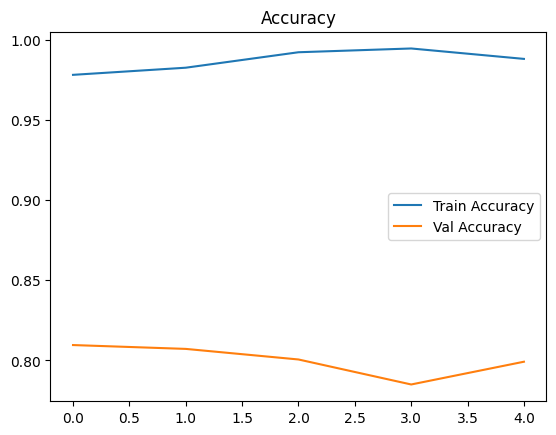

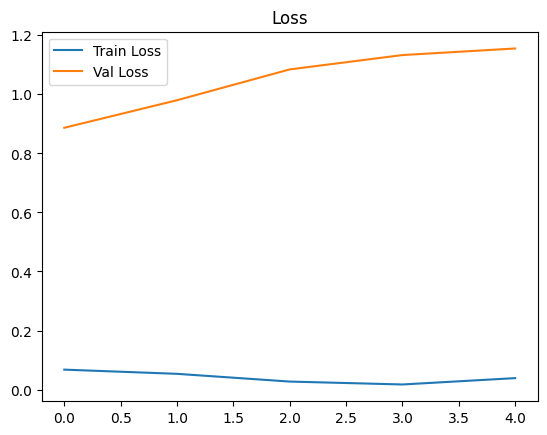

In [10]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')
plt.show()
